# Peak Detection
This notebook is made for detecting peaks of the snippets extracted in module 2 using the function defined in x


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pyarrow.feather as feather
from tqdm import tqdm

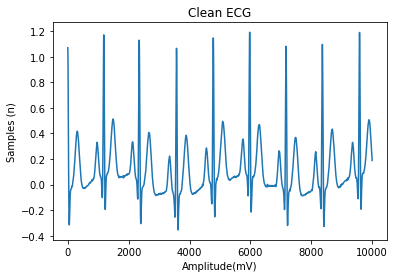

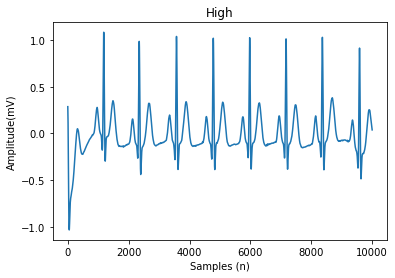

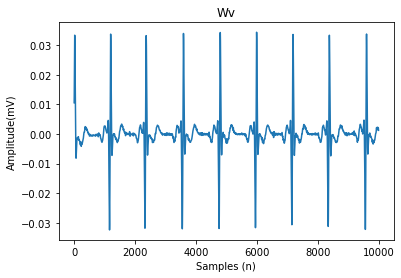

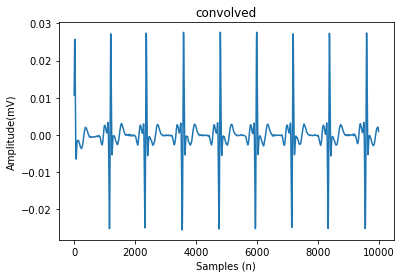

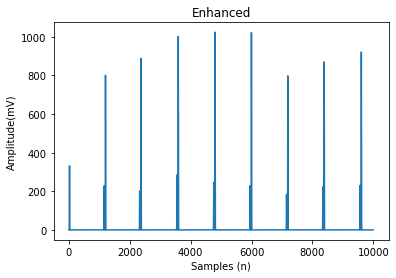

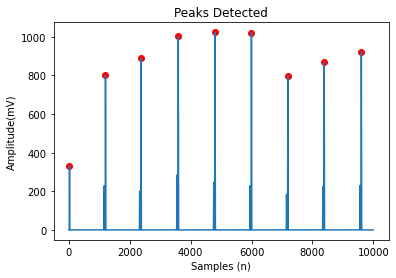

In [3]:
%run "3.0 - Functions_peakdetection.ipynb"

In [15]:
#root = 'G:\My Drive\Molecool\Databases\Database1'
#root = '/Volumes/GoogleDrive/.shortcut-targets-by-id/1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD/Molecool/Databases/Database1' # Jaume's directory
root = 'G:\.shortcut-targets-by-id\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\Molecool\Databases\Database1'

In [17]:
patients = sorted(os.listdir(root))

for pat in tqdm(patients): #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                samplingRate = find_rate(path_folder)
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        path_snip =path_folder + '/' + snip_folder
                        read_meta(path_snip)
                        read_peaks(path_snip, samplingRate)
                        break

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'G:\\.shortcut-targets-by-id\x01sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1'

In [7]:
def read_peaks(path,rate):
    """Function to open snippet files, get peaks, and write them to a new file"""
    df = pd.read_feather(path_snip + '/MSNIP.ftr')   #inputting the ecg feather files in a data frame
    df_peaks = _pantompkinspeaks(df['ecg_0'],rate)
    feather.write_feather(df_peaks, (path_snip + '/PEAKS.ftr'))

In [113]:
def read_meta(path):
    """Function that creates a new meta file for peak files"""
#     with open(path + '\ManualMeta.json') as json_file:
#         metaData = json.load(json_file)
#         json_file.close()
    data = {'Error Flag': False, 'Error Type': 'No error'}
    with open((path + '/PeakMeta.json'), "w") as outfile:
        json.dump(data, outfile)
        outfile.close()

In [114]:
def find_rate(path):
    """"""
    with open(path + '/Meta.json') as json_file:
        metaData = json.load(json_file)
        json_file.close()
        return int(metaData['Sampling rate'])

  0%|                                                         | 0/56 [00:00<?, ?it/s]

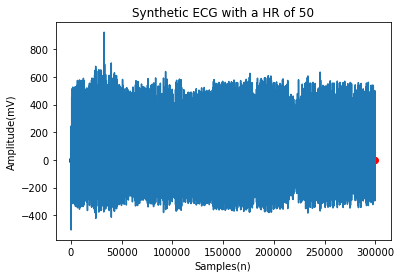

  4%|█▊                                               | 2/56 [00:00<00:08,  6.63it/s]

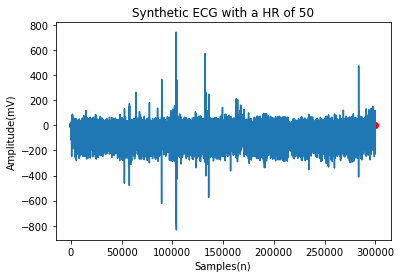

  7%|███▌                                             | 4/56 [00:00<00:08,  6.32it/s]

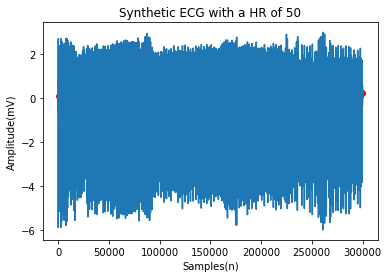

 11%|█████▎                                           | 6/56 [00:01<00:08,  5.64it/s]

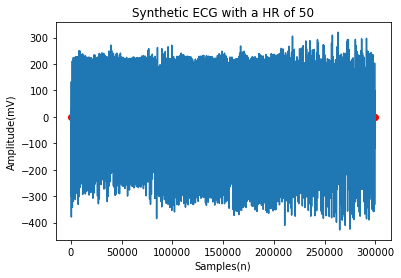

 12%|██████▏                                          | 7/56 [00:01<00:10,  4.46it/s]

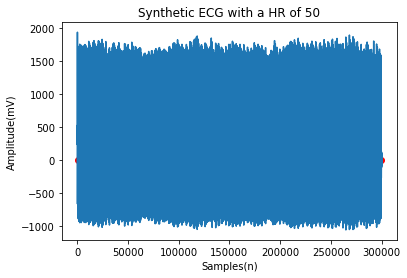

 14%|███████                                          | 8/56 [00:01<00:11,  4.05it/s]

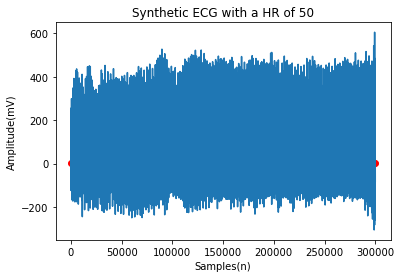

 16%|███████▉                                         | 9/56 [00:02<00:13,  3.45it/s]

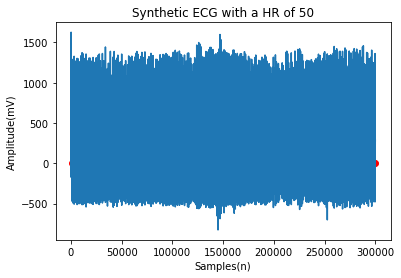

 18%|████████▌                                       | 10/56 [00:02<00:14,  3.28it/s]

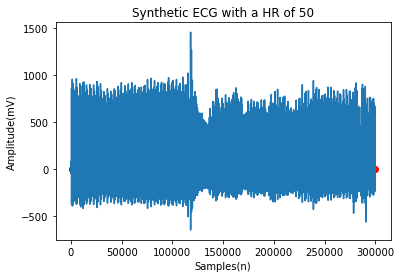

 20%|█████████▍                                      | 11/56 [00:02<00:15,  2.82it/s]

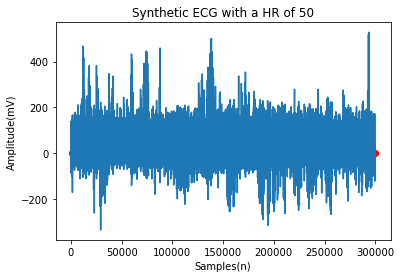

 21%|██████████▎                                     | 12/56 [00:03<00:15,  2.87it/s]

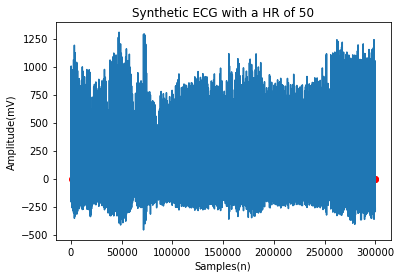

 23%|███████████▏                                    | 13/56 [00:03<00:14,  2.88it/s]

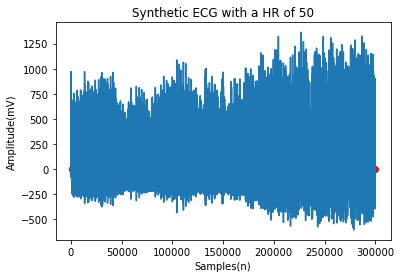

 25%|████████████                                    | 14/56 [00:03<00:14,  2.92it/s]

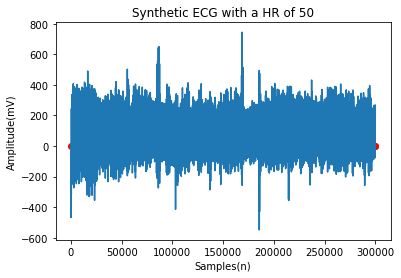

 27%|████████████▊                                   | 15/56 [00:04<00:14,  2.91it/s]

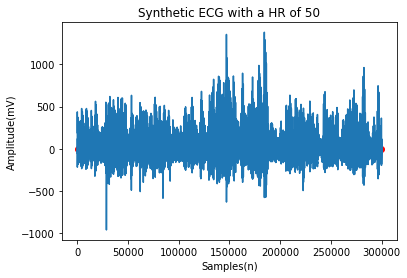

 29%|█████████████▋                                  | 16/56 [00:04<00:12,  3.16it/s]

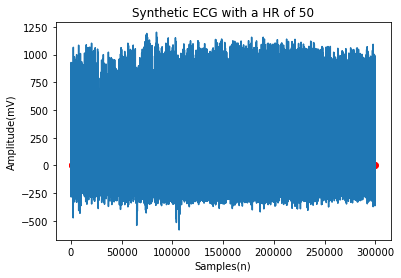

 30%|██████████████▌                                 | 17/56 [00:04<00:12,  3.03it/s]

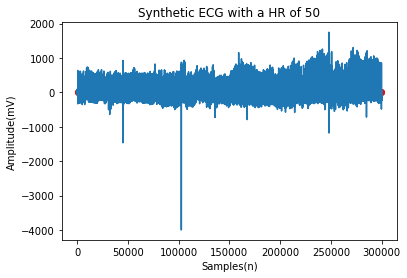

 32%|███████████████▍                                | 18/56 [00:05<00:12,  3.04it/s]

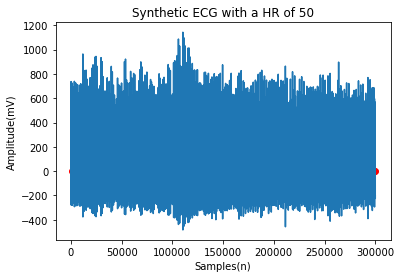

 34%|████████████████▎                               | 19/56 [00:05<00:12,  3.07it/s]

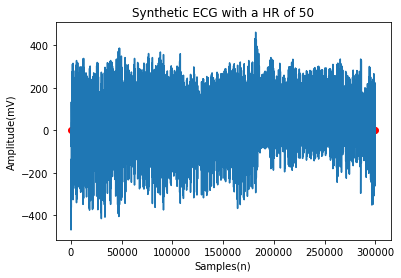

 36%|█████████████████▏                              | 20/56 [00:05<00:11,  3.07it/s]

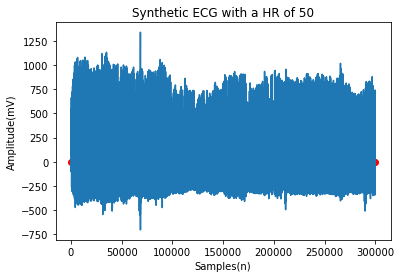

 38%|██████████████████                              | 21/56 [00:06<00:12,  2.90it/s]

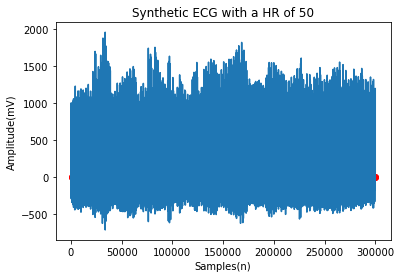

 39%|██████████████████▊                             | 22/56 [00:06<00:11,  2.92it/s]

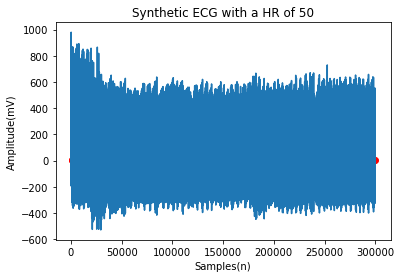

 41%|███████████████████▋                            | 23/56 [00:06<00:11,  2.81it/s]

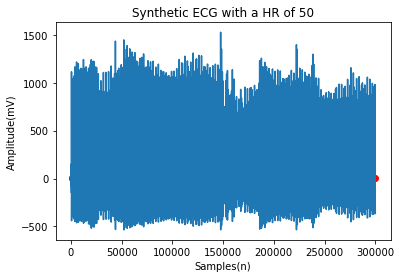

 43%|████████████████████▌                           | 24/56 [00:07<00:11,  2.82it/s]

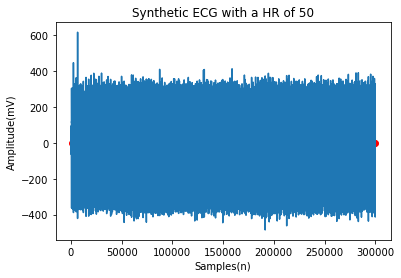

 50%|████████████████████████                        | 28/56 [00:07<00:05,  5.33it/s]

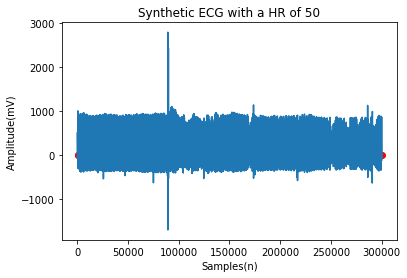

 52%|████████████████████████▊                       | 29/56 [00:08<00:05,  4.68it/s]

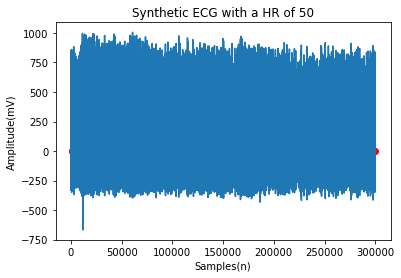

 54%|█████████████████████████▋                      | 30/56 [00:08<00:06,  4.17it/s]

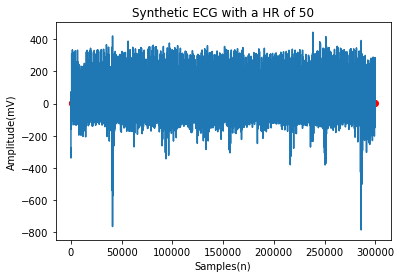

 55%|██████████████████████████▌                     | 31/56 [00:08<00:07,  3.26it/s]

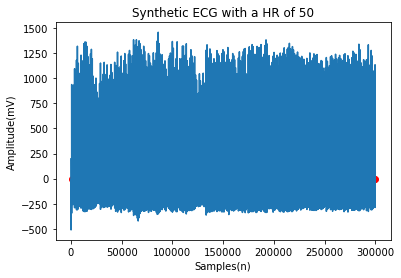

 57%|███████████████████████████▍                    | 32/56 [00:09<00:07,  3.33it/s]

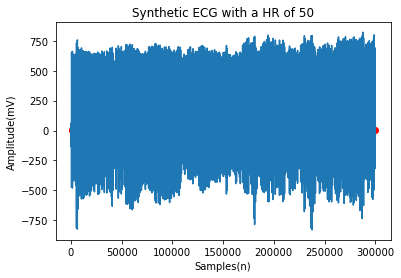

 59%|████████████████████████████▎                   | 33/56 [00:09<00:07,  3.20it/s]

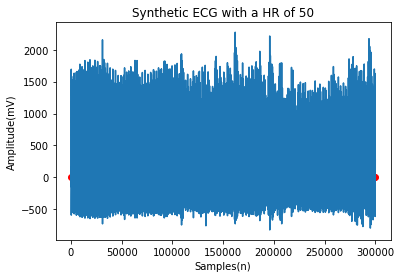

 61%|█████████████████████████████▏                  | 34/56 [00:09<00:06,  3.19it/s]

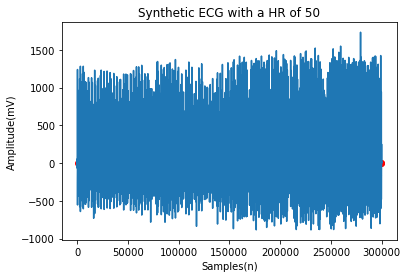

 62%|██████████████████████████████                  | 35/56 [00:10<00:06,  3.17it/s]

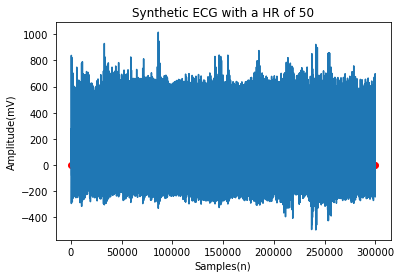

 64%|██████████████████████████████▊                 | 36/56 [00:10<00:06,  3.11it/s]

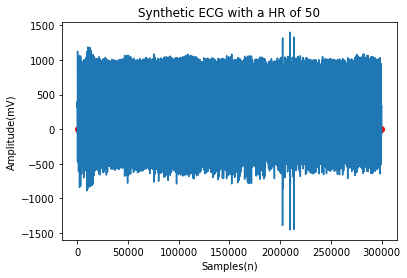

 66%|███████████████████████████████▋                | 37/56 [00:10<00:06,  3.12it/s]

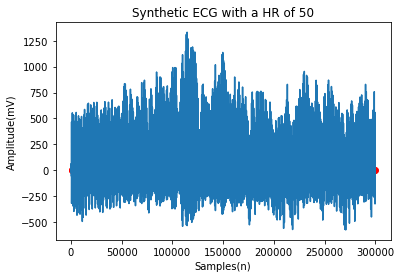

 68%|████████████████████████████████▌               | 38/56 [00:11<00:05,  3.06it/s]

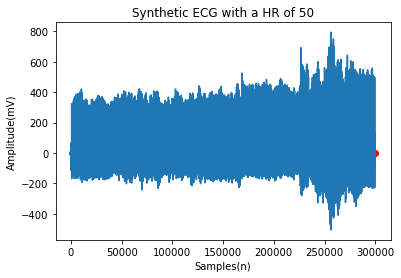

 70%|█████████████████████████████████▍              | 39/56 [00:11<00:05,  3.05it/s]

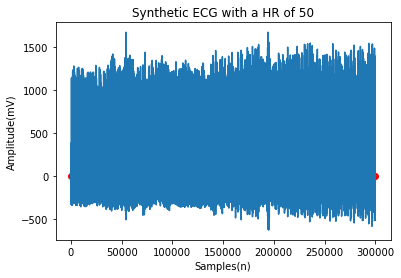

 71%|██████████████████████████████████▎             | 40/56 [00:11<00:05,  3.07it/s]

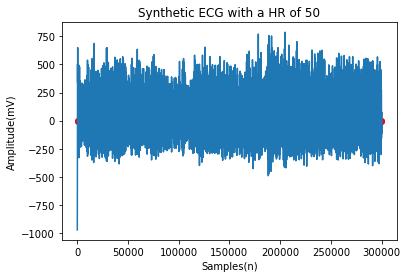

 73%|███████████████████████████████████▏            | 41/56 [00:12<00:05,  2.96it/s]

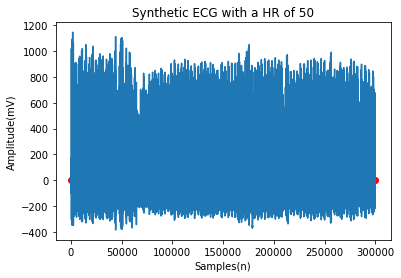

 75%|████████████████████████████████████            | 42/56 [00:12<00:04,  3.02it/s]

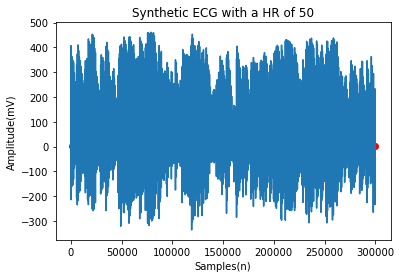

 79%|█████████████████████████████████████▋          | 44/56 [00:12<00:03,  3.80it/s]

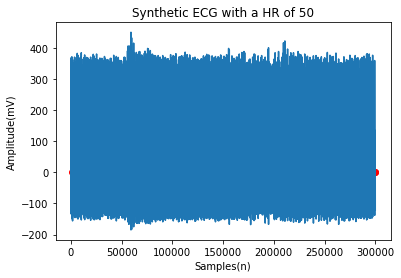

 80%|██████████████████████████████████████▌         | 45/56 [00:13<00:03,  3.51it/s]

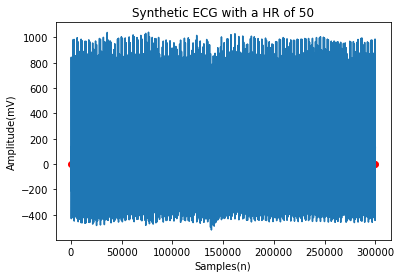

 82%|███████████████████████████████████████▍        | 46/56 [00:13<00:02,  3.44it/s]

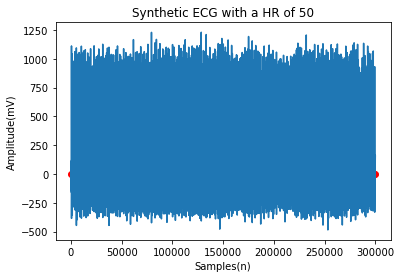

 84%|████████████████████████████████████████▎       | 47/56 [00:13<00:02,  3.24it/s]

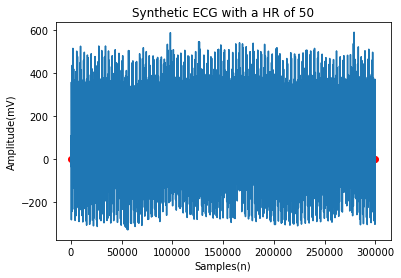

 86%|█████████████████████████████████████████▏      | 48/56 [00:14<00:02,  3.22it/s]

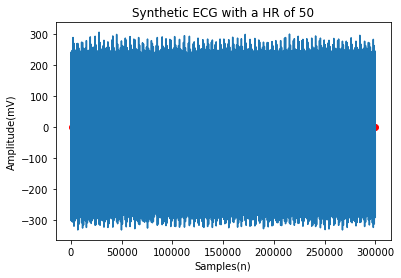

 88%|██████████████████████████████████████████      | 49/56 [00:14<00:02,  2.62it/s]

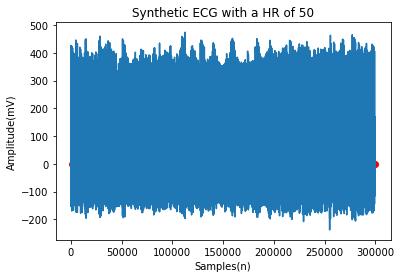

 89%|██████████████████████████████████████████▊     | 50/56 [00:15<00:02,  2.65it/s]

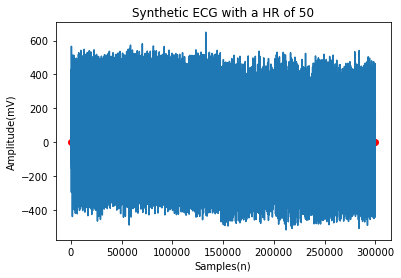

 91%|███████████████████████████████████████████▋    | 51/56 [00:15<00:01,  2.80it/s]

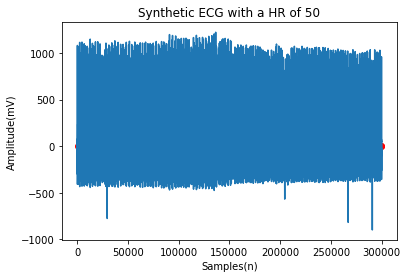

 93%|████████████████████████████████████████████▌   | 52/56 [00:15<00:01,  2.90it/s]

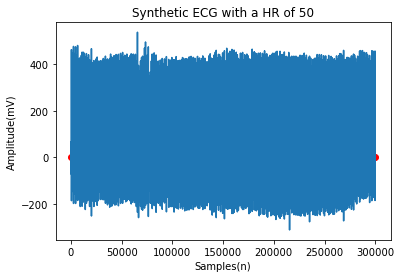

 95%|█████████████████████████████████████████████▍  | 53/56 [00:16<00:01,  2.79it/s]

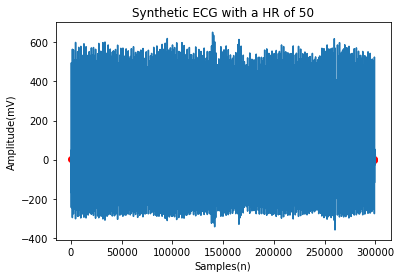

 96%|██████████████████████████████████████████████▎ | 54/56 [00:16<00:00,  2.98it/s]

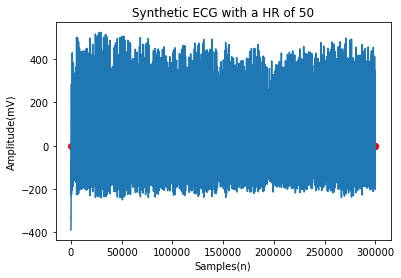

100%|████████████████████████████████████████████████| 56/56 [00:16<00:00,  3.33it/s]


In [115]:
# Check to see the state of the peaks
patients = sorted(os.listdir(root))
for pat in tqdm(patients):     #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                samplingRate = find_rate(path_folder)
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        path_snip =path_folder + '/' + snip_folder
                        df = pd.read_feather(path_snip + '/MSNIP.ftr')
                        df_signal = df['ecg_0']
                        df_peaks = pd.read_feather(path_snip + '/PEAKS.ftr')
                    
                        #print(y_values)
                        #print(df_peaks[df_peaks['x_values'] < 5000])

                        plt.plot(df_signal)
                        plt.title('Synthetic ECG with a HR of 50')
                        plt.xlabel('Samples(n)')
                        plt.ylabel('Amplitude(mV)')
                        plt.scatter(df_peaks['x_values'],df_peaks['y_values'], marker='o',c='red')
                        plt.show()
                        break